### Objective function:
we would like to find the solution of the problem:

$\max_{x\in \mathcal{B}}w\Sigma w - \lambda ||w|_{0} $\$

With $||w||_{0} $ represents the number of non-zero elements in $w$.

### Thresholding function:
After some mathematical derivations, we arrive to the following thresholding operator $H_{\alpha}$
$\begin{equation}
	H_{\alpha}(x)_i = \begin{cases}
		0 & \text{if } \frac{x_{i}^2}{\|x\|_{2}}<\alpha/2\\
		x_{i} & \text{if } \frac{x_{i}^2}{\|x\|}\geq \alpha/2 \\
	\end{cases}.
\end{equation}$

### Small data example
With this example, we show a case where the algorithm does not converge. We rely on the eigenvalue decomposition of $\Sigma = VDV^{\top}$. With $V = [-.302, 0,0,.302,-.905]$ and $\mathbf{D} = 5$


In [1]:
# Sigma is a 5x5 matrix with 
import numpy as np
v = np.array([-.302, 0,0,.302,-.905])
# Reshape to column vector
v = v.reshape(-1, 1)

sig_1 =  np.array([5]).reshape(-1, 1)

# eigenvector decomposition
Sigma = v @ sig_1 @ v.T  # this is not a covariance matrix.

print(Sigma)


[[ 0.45602   0.        0.       -0.45602   1.36655 ]
 [ 0.        0.        0.        0.        0.      ]
 [ 0.        0.        0.        0.        0.      ]
 [-0.45602   0.        0.        0.45602  -1.36655 ]
 [ 1.36655   0.        0.       -1.36655   4.095125]]


Now we apply the funciton l0_spca to the matrix $\Sigma$

In [2]:
# Implementing the l0_pca function on the matrix Sigma.
from op_spca import l0_pca, objective_function
w0 = np.array([-0.4067982, -0.2218409, 0.1263868, 0.7081635, -0.5175255])
print(np.linalg.norm(w0))
obj0 = objective_function(Sigma, w0, 0.7)
print(obj0)
regularization = 0.7
w, obj = l0_pca(Sigma, w0, regularization, method = "cov")
type(obj)
print(obj.shape)



0.9999999847663948
-0.2592389310413883
Convergence achieved after 1001 iterations
(1001, 1)


Let obsever that the objective value does not converge after 1000 iterations. 

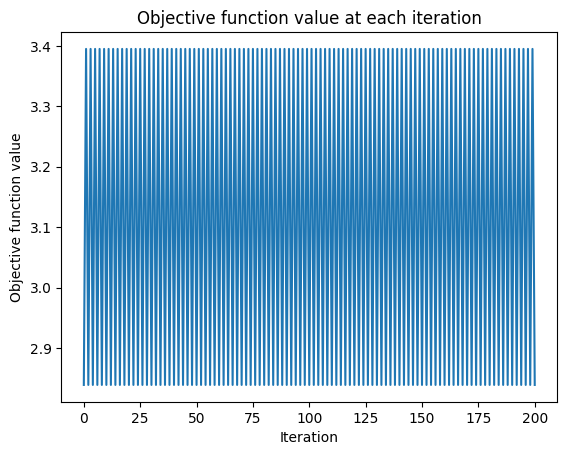

In [3]:
# plotting the objective function value at each iteration
import matplotlib.pyplot as plt
plt.plot(obj[800:])
plt.xlabel('Iteration')
plt.ylabel('Objective function value')
plt.title('Objective function value at each iteration')
plt.show()

### Solution:
We prove that by perturbing the covariance matrix, the algorithm converges. This is proven theoretically and numerically. Now, let us apply the the function with the same parameter using the matrix $\Sigma_{+} = \Sigma + \gamma I$, with $\gamma > 1$.

In [4]:
# Sigma + \gamma I
Sigma_plus = Sigma + 1.1 * np.identity(Sigma.shape[0])
w_plus, obj_plus = l0_pca(Sigma_plus, w0, regularization, method = "cov")


Convergence achieved after 5 iterations


<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:5: SyntaxWarning: invalid escape sequence '\S'
C:\Users\guerraur\AppData\Local\Temp\ipykernel_492\1028003662.py:5: SyntaxWarning: invalid escape sequence '\S'
  plt.title('Objective function value at each iteration for $\Sigma + \gamma I$')


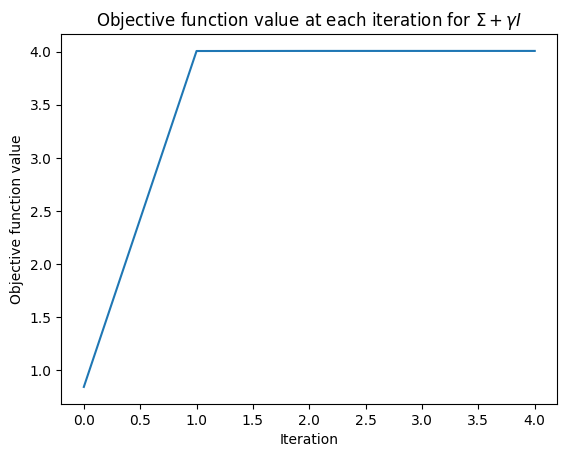

In [5]:
# plotting the objective function value at each iteration for Sigma + \gamma I
plt.plot(obj_plus)
plt.xlabel('Iteration')
plt.ylabel('Objective function value')
plt.title('Objective function value at each iteration for $\Sigma + \gamma I$')
plt.show()

## Real data set experiment:
The data set should be imported first form the the MicOmics R package.

```r 
BiocManager::install("mixOmics")
library(mixOmics)
data("diverse.16S")
dim(diverse.16S$data.TSS)
diverse.16S$bodysite
X <- cbind(diverse.16S$data.TSS)
write.csv(X, "diverse_16_data.csv", row.names = TRUE,col.names = TRUE)```

In [6]:
# load data set using pandas
import pandas as pd
data = pd.read_csv('diverse_16_data.csv',index_col=0)

# print the first 5 rows and 5 columns of the data
print(data.iloc[:5,:5])
print(data.shape)
# check for missing values
print(data.isnull().sum().sum())


           OTU_97.10  OTU_97.10029  OTU_97.101  OTU_97.1010  OTU_97.10101
700015293   0.000161      0.000323    0.000161     0.000161      0.000807
700015227   0.000536      0.000536    0.000536     0.000536      0.001072
700105879   0.000336      0.000336    0.000336     0.000336      0.000336
700037087   0.001042      0.000260    0.000260     0.000260      0.000260
700105616   0.000534      0.000534    0.000534     0.000534      0.000534
(162, 1674)
0


In [7]:
# Implementation of the l0_pca function on the diverse_16_data.csv
# initial weight vector
w0_data = np.random.rand(data.shape[1]).reshape(-1,1)
# regularization parameter
regularization_data = 0.001

# l0_pca
w_data, obj_data = l0_pca(data, w0_data, regularization_data, method = "data")


Convergence achieved after 1001 iterations


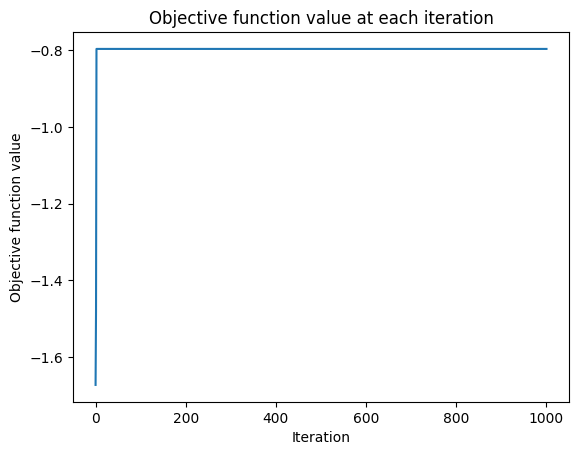

In [11]:
# plotting the objective function value at each iteration
plt.plot(obj_data)
plt.xlabel('Iteration')
plt.ylabel('Objective function value')
plt.title('Objective function value at each iteration')
plt.show()

In [9]:
# add gamma I to the covariance matrix
data_cov = data.T @ data
data_cov_plus = data_cov + 1.01 * np.identity(data_cov.shape[0])
w_data_plus, obj_data_plus = l0_pca(data_cov_plus, w0_data, regularization_data, method = "cov")


Convergence achieved after 41 iterations


<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:5: SyntaxWarning: invalid escape sequence '\S'
C:\Users\guerraur\AppData\Local\Temp\ipykernel_492\3038665790.py:5: SyntaxWarning: invalid escape sequence '\S'
  plt.title('Objective function value at each iteration for $\Sigma + \gamma I$')


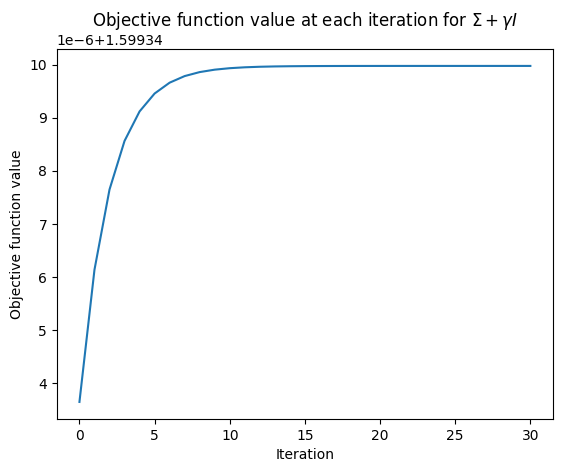

In [10]:
# plotting the objective function value at each iteration for Sigma + \gamma I
plt.plot(obj_data_plus[10:])
plt.xlabel('Iteration')
plt.ylabel('Objective function value')
plt.title('Objective function value at each iteration for $\Sigma + \gamma I$')
plt.show()